In [1]:
import numpy as np

In [2]:
from getpass import getpass
host = "localhost"
port = 27017

user = getpass("user mongo")
password = getpass("password mongo")
database_name = getpass("database name")

uri = f"mongodb://{user}:{password}@{host}:{port}?authSource=admin"

user mongo ········
password mongo ········
database name ········


In [6]:
from pymongo import MongoClient

client = MongoClient(uri)
db = client[database_name]
collection = db["sentiment-analysis"]

In [7]:
query = {
    "source": "portuguese-tweets-for-sentiment-analysis"
}

print(collection.count_documents(query))

response = collection.find(query)

889312


In [8]:
import pandas as pd

df = pd.DataFrame(list(response))
df

,_id,id,sentiment,source,text,bert_text,bert_text_processed_at
0,68fc3dac30589e1d5a736896,110b5a3e-7f97-4dba-9763-bd1b2ffdd5f1,2,portuguese-tweets-for-sentiment-analysis,@Tixaa23 14 para eu ir :),para eu ir,2025-10-25 03:13:04.035
1,68fc3dac30589e1d5a736897,c604571f-64d7-4843-9e42-89af14f0e120,2,portuguese-tweets-for-sentiment-analysis,@drexalvarez O meu like eu já dei na época :),o meu like eu ja dei na epoca,2025-10-25 03:13:04.036
2,68fc3dac30589e1d5a736898,71320764-1cca-47f5-a287-2b447f9ae438,2,portuguese-tweets-for-sentiment-analysis,Eu só queria conseguir comer alguma coisa pra ...,eu so queria conseguir comer alguma coisa pra ...,2025-10-25 03:13:04.037
3,68fc3dac30589e1d5a736899,9e1d9978-4d9c-44b3-b376-f0803c2fb348,2,portuguese-tweets-for-sentiment-analysis,:D que lindo dia !,que lindo dia !,2025-10-25 03:13:04.038
4,68fc3dac30589e1d5a73689a,ec587b05-cc9d-4719-93f1-c8e5c2fbf133,2,portuguese-tweets-for-sentiment-analysis,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...","pq da pr jeito!!e uma ""oferta"", ha q aproveitar.",2025-10-25 03:13:04.039
...,...,...,...,...,...,...,...
889307,68fc3dd230589e1d5a80fa71,5ed841c4-ceae-4a1a-b354-980938d2cf16,2,portuguese-tweets-for-sentiment-analysis,As concorrentes estão prontas para tudo. :p Lo...,as concorrentes estao prontas para tudo. love ...,2025-10-25 03:23:33.718
889308,68fc3dd230589e1d5a80fa72,306a7668-023b-47ce-b2e5-c90b61812e69,2,portuguese-tweets-for-sentiment-analysis,@Frases_RCampos @vrr93 Falei de um já pensando...,falei de um ja pensando em conectar com o gove...,2025-10-25 03:23:33.718
889309,68fc3dd230589e1d5a80fa73,e9d76639-946f-4c29-8af0-7dcff5a4118d,2,portuguese-tweets-for-sentiment-analysis,@njg00 @christophssj @pecesiqueira @cauemoura ...,"eu comecei isentao, pesquisei bastante, baixei...",2025-10-25 03:23:33.719
889310,68fc3dd230589e1d5a80fa74,be308efb-43f4-454c-8805-fe0b02744063,0,portuguese-tweets-for-sentiment-analysis,que coisa mais triste uma amiga defendendo um ...,que coisa mais triste uma amiga defendendo um ...,2025-10-25 03:23:33.720


In [9]:
df = df.drop(columns=["_id"])

In [10]:
df[df['bert_text'].str.split().apply(len) == 2]

,id,sentiment,source,text,bert_text,bert_text_processed_at
17,1343e40b-e2f7-4e07-bad9-a8e8bd0723bd,2,portuguese-tweets-for-sentiment-analysis,@LelloucheNico Bravo ! :),bravo !,2025-10-25 03:13:04.049
20,c0a1e82d-09b5-41f6-8475-2ce0e5b1969a,2,portuguese-tweets-for-sentiment-analysis,@tommezequiel10 de nada :),de nada,2025-10-25 03:13:04.051
27,ab772a31-a860-4d84-bd35-093831d6371b,2,portuguese-tweets-for-sentiment-analysis,@aclarapinheir0 Delicada demais :D,delicada demais,2025-10-25 03:13:04.057
48,5b1e71a3-c76a-4fae-ab8b-55ca9c475d03,2,portuguese-tweets-for-sentiment-analysis,@Roboox23 De nada :D,de nada,2025-10-25 03:13:04.072
54,ad0df701-6626-4b7a-b96a-c081436e627e,2,portuguese-tweets-for-sentiment-analysis,@xtramirrestrial dinosaurs!!!! :) https://t.co...,dinosaurs!!!! https/t.co/utqtvnisv,2025-10-25 03:13:04.076
...,...,...,...,...,...,...
889020,767063a7-bdfc-47cf-a5df-b1b50d093e11,0,portuguese-tweets-for-sentiment-analysis,@cirogomes oi saudades :(,oi saudades,2025-10-25 03:23:33.527
889055,e2cc3be2-61d6-4815-ae82-be3b0672fb58,2,portuguese-tweets-for-sentiment-analysis,@jairbolsonaro Muito bom :),muito bom,2025-10-25 03:23:33.549
889079,c84df9d3-e3e2-4d6f-981d-8035e4150237,0,portuguese-tweets-for-sentiment-analysis,@misscaviar @jairbolsonaro É lamentável :(,e lamentavel,2025-10-25 03:23:33.565
889143,f886f867-3ee2-4efc-b91f-7d6fe90b3dc9,0,portuguese-tweets-for-sentiment-analysis,faltou lula :(,faltou lula,2025-10-25 03:23:33.606


In [11]:
def count_problematic_docs(df):
    print(df["bert_text"].isna().sum())
    print(df["bert_text"].isnull().sum())
    print((df["bert_text"] == "").sum())



count_problematic_docs(df)

0
0
0


In [12]:
df[df["bert_text"] == ""]

,id,sentiment,source,text,bert_text,bert_text_processed_at


In [13]:
df = df[df["bert_text"] != ""]
count_problematic_docs(df)

0
0
0


In [1]:
from transformers import AutoTokenizer, AutoModel 

MODEL_NAME = "neuralmind/bert-base-portuguese-cased"
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=False)


In [15]:
# Store length of each text 
token_lens = []

# Iterate through the bert_text slide
for text in df["bert_text"]:
    tokens = tokenizer.encode(text, max_length=512, truncation=True)
    token_lens.append(len(tokens))

<Axes: ylabel='Count'>

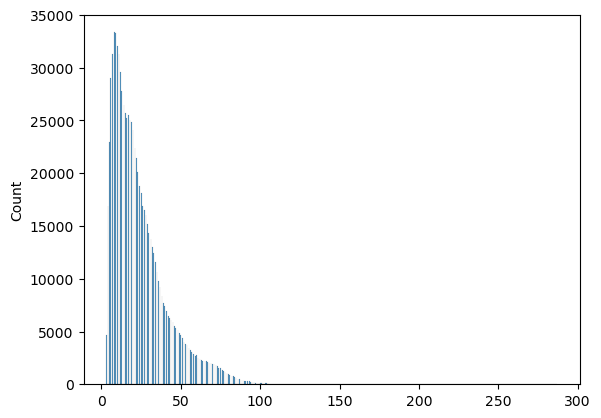

In [16]:
import seaborn as sns

sns.histplot(token_lens)

In [ ]:
# Plot the distribution
class_names = ['negative', 'neutral', 'positive']
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)

In [18]:
MAX_LENGTH = 75

In [19]:
from torch.utils.data import Dataset, DataLoader
class SentimentDataset(Dataset):
    # Constructor Function 
    def __init__(self, texts, targets, tokenizer, max_len):
        self.texts = texts
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.texts)
    
    # get item magic method
    def __getitem__(self, item):
        text = str(self.texts[item])
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            padding='max_length',
            truncation=True, 
            max_length=self.max_len,
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'text_text': text,
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'targets': torch.tensor(target, dtype=torch.long)
        }


def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = SentimentDataset(
        texts=df.bert_text.to_numpy(),
        targets=df.sentiment.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [3]:
from torch import nn

class SentimentClassifier(nn.Module):
    
    # Constructor class 
    def __init__(self, n_classes, model_name):
        super(SentimentClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    
    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        outputs  = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        #  Add a dropout layer 
        pooled_output = outputs.pooler_output
        output = self.drop(pooled_output)
        return self.out(output)

In [4]:
model = SentimentClassifier(3, MODEL_NAME)
device = "cuda"
model = model.to(device)

In [28]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [29]:
BATCH_SIZE = 32
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LENGTH, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LENGTH, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LENGTH, BATCH_SIZE)

In [30]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW

# Number of iterations 
EPOCHS = 10

# Optimizer Adam 
optimizer = AdamW(model.parameters(), lr=2e-5)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the loss function 
loss_fn = nn.CrossEntropyLoss().to(device)

In [31]:
# Function for a single training iteration
from tqdm import tqdm
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in tqdm(data_loader):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        # Backward prop
        loss.backward()
        
        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)


In [32]:


def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in tqdm(data_loader):
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)

In [24]:
%%time
from collections import defaultdict
import torch

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    
    # Show details 
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    
    print(f"Train loss {train_loss} accuracy {train_acc}")
    
    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )
    
    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/10
----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22233/22233 [19:58<00:00, 18.56it/s]


Train loss 0.3076726891633572 accuracy 0.8646775805433699


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2780/2780 [00:53<00:00, 51.89it/s]


Val   loss 0.2897692160908696 accuracy 0.8766459389864052

Epoch 2/10
----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22233/22233 [19:58<00:00, 18.55it/s]


Train loss 0.24625749269954705 accuracy 0.8969947248502703


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2780/2780 [00:53<00:00, 51.75it/s]


Val   loss 0.303229197441674 accuracy 0.8781302358007893

Epoch 3/10
----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22233/22233 [23:42<00:00, 15.63it/s]


Train loss 0.1993863308654043 accuracy 0.921851039217147


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2780/2780 [01:13<00:00, 37.71it/s]


Val   loss 0.33893701810282556 accuracy 0.8770057685171649

Epoch 4/10
----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22233/22233 [24:33<00:00, 15.09it/s]


Train loss 0.16402428949439268 accuracy 0.9396766317754329


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2780/2780 [01:13<00:00, 37.99it/s]


Val   loss 0.4000319993585723 accuracy 0.8750491954436586

Epoch 5/10
----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22233/22233 [24:21<00:00, 15.22it/s]


Train loss 0.13888893767974078 accuracy 0.9519698530745


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2780/2780 [01:11<00:00, 38.96it/s]


Val   loss 0.4647355694776039 accuracy 0.8737448133946543

Epoch 6/10
----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22233/22233 [23:53<00:00, 15.50it/s]


Train loss 0.11955821102196486 accuracy 0.9607055460054058


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2780/2780 [01:14<00:00, 37.45it/s]


Val   loss 0.5184423369554829 accuracy 0.87244043134565

Epoch 7/10
----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22233/22233 [23:36<00:00, 15.69it/s]


Train loss 0.10296638793705164 accuracy 0.9676898836037439


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2780/2780 [01:13<00:00, 37.94it/s]


Val   loss 0.6129380537679405 accuracy 0.8722942505987787

Epoch 8/10
----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22233/22233 [23:34<00:00, 15.72it/s]


Train loss 0.08911853912569737 accuracy 0.9733051842085658


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2780/2780 [01:11<00:00, 38.95it/s]


Val   loss 0.6342230332056362 accuracy 0.8728564842405909

Epoch 9/10
----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22233/22233 [23:17<00:00, 15.90it/s]


Train loss 0.07728110762285943 accuracy 0.9773195267686088


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2780/2780 [01:09<00:00, 39.89it/s]


Val   loss 0.6784745272560541 accuracy 0.8734412072280756

Epoch 10/10
----------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22233/22233 [23:09<00:00, 16.00it/s]


Train loss 0.06925157138865524 accuracy 0.9799423430210739


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2780/2780 [01:09<00:00, 40.08it/s]

Val   loss 0.7059240318417068 accuracy 0.8747568339499162

CPU times: total: 3h 53min 37s
Wall time: 4h 1min 31s


In [5]:
import torch
model.load_state_dict(torch.load("./best_model_state.bin", map_location=device))


<All keys matched successfully>

In [33]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

100%|████████████████████████████████| 2780/2780 [00:53<00:00, 52.05it/s]


0.8793572617280618

In [46]:
def get_predictions(model, data_loader):
    model = model.eval()

    texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in tqdm(data_loader):
            texts = d["text_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get outouts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return texts, predictions, prediction_probs, real_values




In [47]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)

100%|████████████████████████████████| 2780/2780 [00:39<00:00, 69.55it/s]


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ["Negativo", "Neutro", "Positivo"]
print(classification_report(y_test, y_pred, target_names=class_names))


              precision    recall  f1-score   support

    Negativo       0.88      0.93      0.91     54759
      Neutro       0.98      0.99      0.99      5311
    Positivo       0.86      0.76      0.80     28862

    accuracy                           0.88     88932
   macro avg       0.91      0.89      0.90     88932
weighted avg       0.88      0.88      0.88     88932



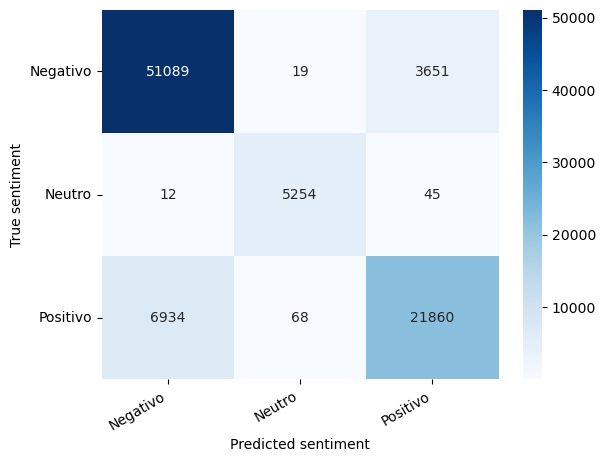

In [51]:
import matplotlib.pyplot as plt

def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [23]:
import preprocess
def preprocess_bert(text):
    text = text.lower()
    text = preprocess.remove_usernames(text)
    text = preprocess.remove_hashtags(text)
    text = preprocess.remove_emoticons(text)
    text = preprocess.remove_urls(text)
    text = preprocess.remove_accents(text)
    text = preprocess.remove_numbers(text)
    text = preprocess.remove_extra_whitespace(text)
    return text

text = "isso é bom"
text = preprocess_bert(text)
text_tokenized = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            padding='max_length',
            truncation=True, 
            max_length=75,
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors='pt',
 )

class_names = ["Negativo", "Neutro", "Positivo"]
input_ids = text_tokenized['input_ids'].to(device)
attention_mask = text_tokenized['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {text}')
print(f'Sentiment  : {class_names[prediction]}')





Review text: isso e bom
Sentiment  : Positivo
